# Entrenamiento con casi nada de limpieza

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('estadistica-final.csv', sep=';', encoding='cp1252',decimal=",")

# Eliminamos datos que no contribuyen nada en el funcionamiento del algoritmo
df = df.drop('FECHACIR', axis=1)
df = df.drop('FECHAFIN', axis=1)
df = df.drop('ETNIA', axis=1)
df = df.drop('HISTO2', axis=1)
df = df.drop('Unnamed: 52', axis=1)
df = df.drop('Unnamed: 53', axis=1)
df = df.drop('NHIS', axis=1)
df = df.drop(df.iloc[:,-14:], axis=1)

df.shape

(269, 39)

In [3]:
# Variables categoricas a valores numericos
def df_categorical_to_encoded():
    for column in df:
        if df[column].dtypes == object:
            label_encoder = LabelEncoder()
            categorical_Encoded = label_encoder.fit_transform(df[column])
            df[column] = categorical_Encoded

df_categorical_to_encoded()

In [4]:
# Si hay algun campo sin datos, lo rellenamos con la mediana de la columna
def na_to_median():
    for column in df:
        if(df[column].isnull().values.any()):
            median = df[column].median()
            df[column].fillna(median, inplace=True)
na_to_median()

In [ ]:
df.info()

In [ ]:
df.hist(bins=df.shape[1], figsize=(41,20))

In [ ]:
df['HISTO'].hist()

In [ ]:
# Variable a predecir
df['RBQ'].hist()

### Random Forest Pipeline

              precision    recall  f1-score   support

           1       0.57      0.27      0.36        15
           2       0.81      0.93      0.87        61
           3       0.75      0.60      0.67         5

    accuracy                           0.79        81
   macro avg       0.71      0.60      0.63        81
weighted avg       0.77      0.79      0.76        81

Score: 0.7901234567901234


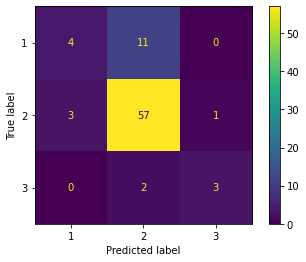

In [5]:
y = df['RBQ'] 
X = df.drop('RBQ', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

pipe_rfc = Pipeline([
                    ('scl', StandardScaler()),
                    ('norm', MinMaxScaler()),
                    ('rfc', RandomForestClassifier(n_estimators=100, bootstrap=False, max_features='sqrt'))    
                    ])

pipe_rfc.fit(X_train, y_train)

plot_confusion_matrix(pipe_rfc, X_test, y_test)
print(classification_report(y_test, pipe_rfc.predict(X_test)))
print('Score: ' + str(pipe_rfc.score(X_test, y_test)))


### KNN Pipeline

              precision    recall  f1-score   support

           1       0.40      0.18      0.25        11
           2       0.84      0.97      0.90        64
           3       1.00      0.33      0.50         6

    accuracy                           0.81        81
   macro avg       0.75      0.49      0.55        81
weighted avg       0.79      0.81      0.78        81

Score: 0.8148148148148148


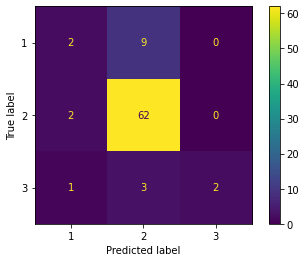

In [7]:
y = df['RBQ'] 
X = df.drop('RBQ', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

pipe_knn = Pipeline([
                     ('scl', StandardScaler()),
                     ('norm', MinMaxScaler()),
                     ('knn', KNeighborsClassifier(8))    
                    ])

pipe_knn.fit(X_train, y_train)

plot_confusion_matrix(pipe_knn, X_test, y_test)
print(classification_report(y_test, pipe_knn.predict(X_test)))
print('Score: ' + str(pipe_knn.score(X_test, y_test)))

### Logistic Regression Pipeline

              precision    recall  f1-score   support

           1       0.57      0.53      0.55        15
           2       0.86      0.93      0.89        59
           3       0.67      0.29      0.40         7

    accuracy                           0.80        81
   macro avg       0.70      0.58      0.62        81
weighted avg       0.79      0.80      0.79        81

Score: 0.8024691358024691


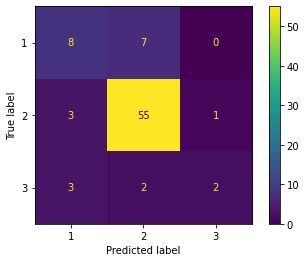

In [10]:
y = df['RBQ'] 
X = df.drop('RBQ', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

pipe_clr = Pipeline([
                     ('scl', StandardScaler()),
                     ('norm', MinMaxScaler()),
                     ('clr', LogisticRegression(C=1.0, penalty='l2', random_state=1))    
                    ])

pipe_clr.fit(X_train, y_train)

plot_confusion_matrix(pipe_clr, X_test, y_test)
print(classification_report(y_test, pipe_clr.predict(X_test)))
print('Score: ' + str(pipe_clr.score(X_test, y_test)))

### Pipe Ensemble Learning

              precision    recall  f1-score   support

           1       0.64      0.41      0.50        17
           2       0.81      0.95      0.87        58
           3       1.00      0.33      0.50         6

    accuracy                           0.79        81
   macro avg       0.82      0.56      0.62        81
weighted avg       0.79      0.79      0.77        81

Score: 0.7901234567901234


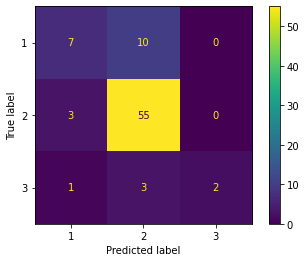

In [43]:
y = df['RBQ'] 
X = df.drop('RBQ', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

pipe_rfc = Pipeline([
                     ('scl', StandardScaler()),
                     ('norm', MinMaxScaler()),
                     ('rfc', RandomForestClassifier(n_estimators=100, bootstrap=False, max_features='sqrt'))    
                    ])

pipe_knn = Pipeline([
                     ('scl', StandardScaler()),
                     ('norm', MinMaxScaler()),
                     ('knn', KNeighborsClassifier(8))    
                    ])

pipe_clr = Pipeline([
                     ('scl', StandardScaler()),
                     ('norm', MinMaxScaler()),
                     ('clr', LogisticRegression(C=1.0, penalty='l2', random_state=1))    
                    ])

voting_clf = VotingClassifier(
                              estimators=[('prfc', pipe_rfc),('pknn', pipe_knn), ('pclr', pipe_clr)],
                              voting='soft'
                            )

voting_clf.fit(X_train, y_train)

plot_confusion_matrix(voting_clf, X_test, y_test)
print(classification_report(y_test, voting_clf.predict(X_test)))
print('Score: ' + str(voting_clf.score(X_test, y_test)))

In [ ]:


# fit scaler on training data
normalized = MinMaxScaler().fit_transform(X_train)

columns = [column for column in list(df.columns) if column in list(X_train.columns)]

norm_df = pd.DataFrame(normalized, columns = columns)
norm_df.hist(bins=df.shape[1], figsize=(41,20))

In [ ]:
model_test = RandomForestClassifier(n_estimators=100, bootstrap=False, verbose=2, max_features='sqrt')

model_test.fit(norm_df, y_train)

plot_confusion_matrix(model_test, X_train, y_train)
print(classification_report(y_train, model_test.predict(X_train)))

## Random Forest

In [ ]:
# Entrenamiento

y = df['RBQ'] 
X = df.drop('RBQ', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

model = RandomForestClassifier(n_estimators=100, bootstrap=False, verbose=2, max_features='sqrt')

model.fit(X_train, y_train)

In [ ]:
# Training Confusion Matrix

plot_confusion_matrix(model, X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))

In [ ]:
# Test Confusion Matrix

plot_confusion_matrix(model, X_test, y_test)
print(classification_report(y_test, model.predict(X_test)))

## K-NN

In [ ]:
#K-NN

# Miramos que rango k nos ofrece una mayor precisión

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    """"
    # fit scaler on training data
    norm = MinMaxScaler().fit(X_train)

    # transform training data
    X_train_norm = norm.transform(X_train)

    # transform testing dataabs
    X_test_norm = norm.transform(X_test)
    """
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,20))

In [ ]:
n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

"""
# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)
"""

knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

In [ ]:
plot_confusion_matrix(knn, X_train, y_train)
print(classification_report(y_train, knn.predict(X_train)))